In [225]:
#Importing required libraries

from datasets import load_dataset
import time
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import *
import math

In [28]:
dataset = load_dataset("mnist")

Found cached dataset mnist (C:/Users/HP/.cache/huggingface/datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:06<?, ?it/s]

In [29]:
#understanding data
dataset.column_names

{'train': ['image', 'label'], 'test': ['image', 'label']}

In [30]:
#making a local copy of data
ds=dataset['train']['image']
final_ds=np.empty(shape=(784,60000),dtype='uint8')
for i in range(1,60001):
    final_ds[:,i-1]=np.array(ds[i-1]).flatten()

In [7]:
#final data set is the set of all the imgs flattened out stored in a big np array 784X60000

In [8]:
#Final_ds is the dataset of D rows and N columns.

final_ds.shape

(784, 60000)

In [ ]:
#############*****1(a)******####################

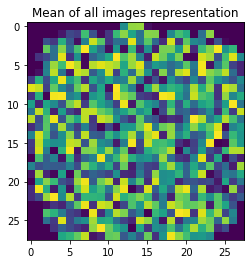

0.5287539958953857


In [32]:
#Calculating the mean of the dataset

mean_zeros=np.zeros((784),dtype='uint8')
mean_zeros=mean_zeros.flatten()
#print(mean_zeros)
start=time.time()
n=60000
for i in range(1,n+1):
    mean_zeros+=final_ds[:,i-1];
#print(mean_zeros)
mean_zeros=mean_zeros/n
#print(mean_zeros==final_ds[:,0])

newimg=mean_zeros.reshape(28,28)
#print(mean_zeros)
plt.imshow(newimg)
plt.title('Mean of all images representation')
plt.show()
end=time.time()
print(end-start)
#print(mean_zeros)

In [33]:
#Centering the data

centered_data=final_ds.T-mean_zeros
centered_data=centered_data.T

In [34]:
#Computing the covariance matrix

C = np.matmul(centered_data,centered_data.T) * (1/60000)

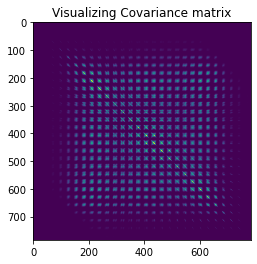

In [36]:
##visualizing Covariance matrix.

plt.imshow(C,interpolation='none')
plt.title("Visualizing Covariance matrix")
plt.show()

In [37]:
#Computing the eigenvector, eigenvalues using eig() function from linalg library

v,w=eig(C)

#w is eigenvectors
#v is eigenvalues

In [38]:
#Sorting the eigenvectors based on eigenvalues.

indexes_of = v.argsort()[::-1]
sorted_eigenvals = v[indexes_of]
sorted_eigenvecs = w[:,indexes_of]

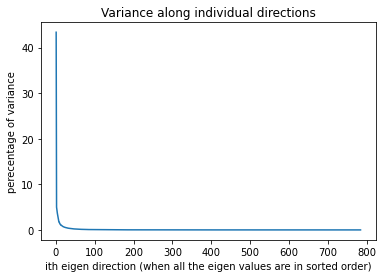

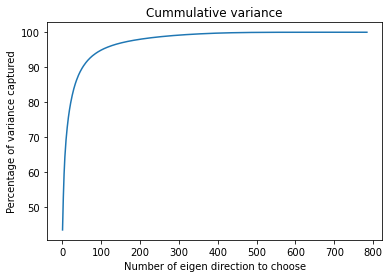

with  102  largest eigenvectors (eigenvalue wise) represent the 95% of variance of whole data


In [39]:
#plotting variance along directions

variance_along_eigedirs = 100*sorted_eigenvals/sum(sorted_eigenvals)
X=np.linspace(start=1,stop=784,num=784)
plt.plot(X,variance_along_eigedirs)
plt.title('Variance along individual directions')
plt.ylabel('perecentage of variance')
plt.xlabel('ith eigen direction (when all the eigen values are in sorted order)')
plt.show()


count=0
cummulative_variance=np.zeros(784)
for i in range(0,784):
    count+=variance_along_eigedirs[i]
    cummulative_variance[i]=count
    
plt.plot(X,cummulative_variance)
plt.title('Cummulative variance')
plt.ylabel('Percentage of variance captured')
plt.xlabel('Number of eigen direction to choose')
plt.show()

break_even_point=0
for i in range(0,784):
    if(cummulative_variance[i]>95):
        break_even_point=i
        break
        
print("with ",break_even_point," largest eigenvectors (eigenvalue wise) represent the 95% of variance of whole data")

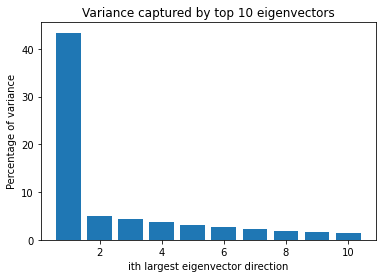

In [57]:
#variance along individual directions

xx=np.linspace(1,10,10,dtype='uint8')
plt.bar(xx,variance_along_eigedirs[:10])
plt.title('Variance captured by top 10 eigenvectors')
plt.ylabel('Percentage of variance')
plt.xlabel('ith largest eigenvector direction')
plt.show()

In [ ]:
#############*****1(b)******####################

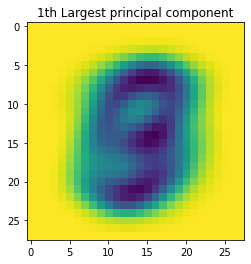

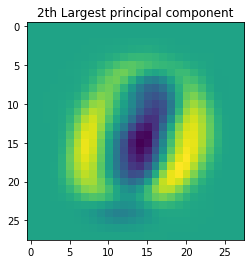

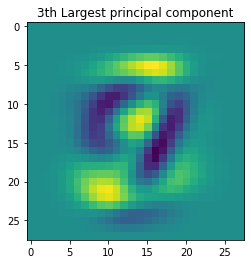

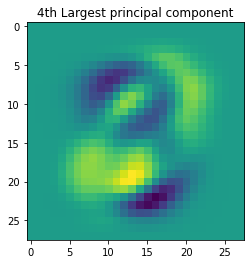

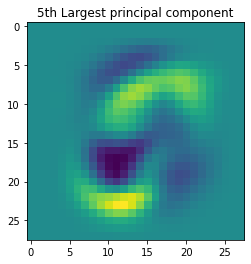

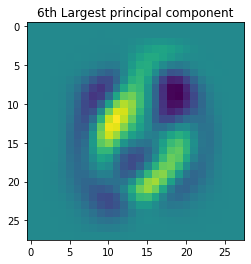

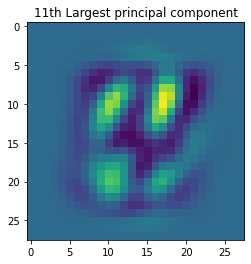

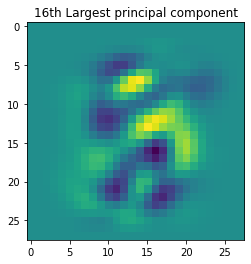

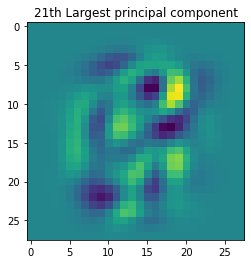

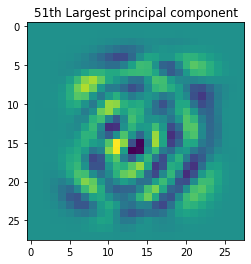

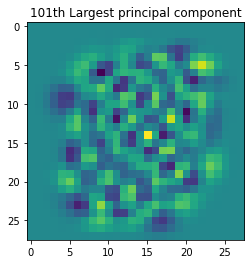

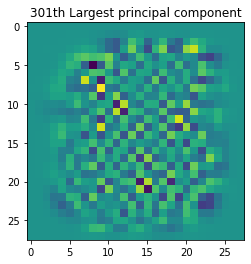

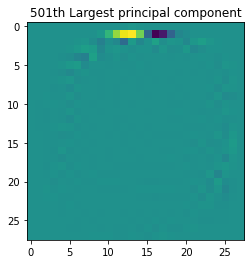

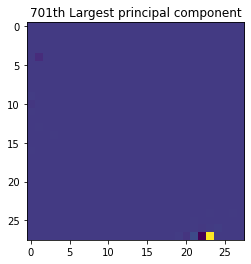

In [58]:
#Visualizing prinicipal directions

req=[0,1,2,3,4,5,10,15,20,50,100,300,500,700]
for i in req:
    
    plt.imshow(sorted_eigenvecs[:,i].reshape((28,28)))
    plt.title(str(i+1)+"th Largest principal component")
    plt.show()

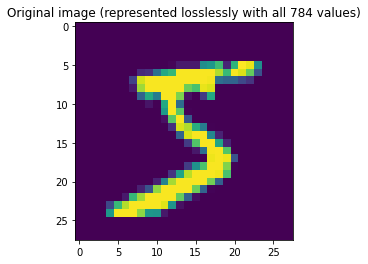

In [66]:
#original data

plt.imshow(final_ds[:,0].reshape((28,28)))
plt.title("Original image (represented losslessly with all 784 values)")
plt.show()


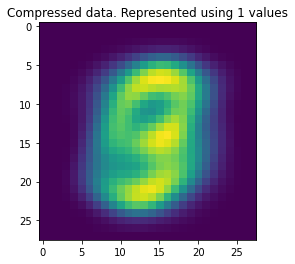

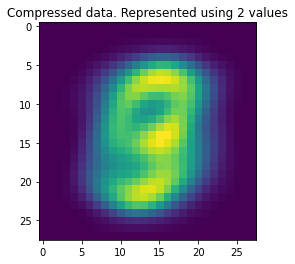

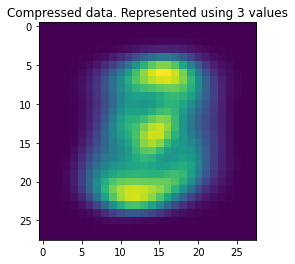

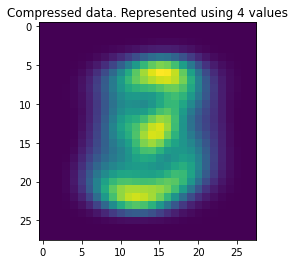

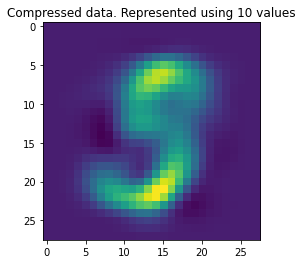

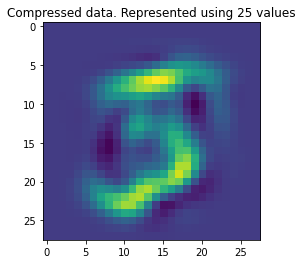

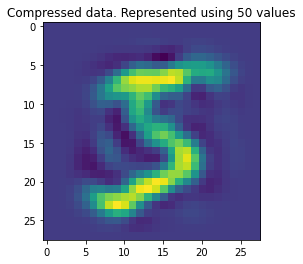

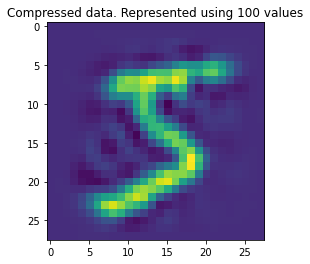

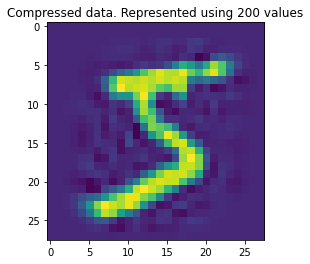

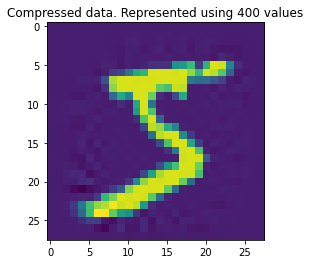

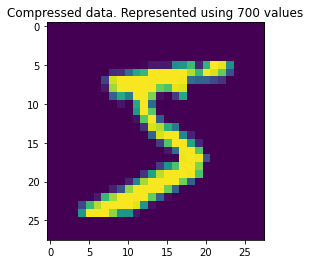

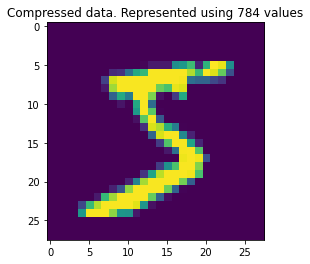

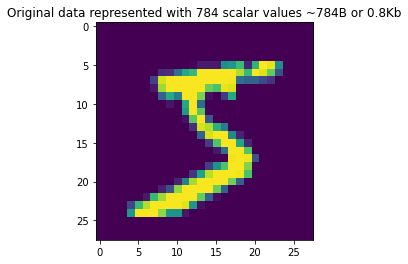

In [69]:
#compressed representation

example_1 = final_ds[:,0]
b=[1,2,3,4,10,25,50,100,200,400,700,784]
for idx in b:
    New_proxies=np.zeros(idx)
    for i in range(0,idx):
            New_proxies[i]=np.dot(example_1,sorted_eigenvecs[:,i])
    Compressed_data = sorted_eigenvecs[:,0:idx]*New_proxies

    Final_comression = np.zeros(784)
    for i in range(0,784):
        sumss=0
        for j in range(0,idx):
            sumss+=Compressed_data[i,j]
        Final_comression[i]=sumss
    #print(Final_comression)
    plt.imshow(Final_comression.reshape(28,28))
    plt.title("Compressed data. Represented using "+str(idx)+" values")
    plt.show()
    
plt.imshow(final_ds[:,0].reshape(28,28))
plt.title("Original data represented with 784 scalar values ~784B or 0.8Kb")
plt.show()

In [ ]:
#############*****1(c) & 1(d)******####################

In [ ]:
"""
The original data size of 60,000 is very huge the computation costs in the orders of ~O(N^3) 
which is ~10^14
its a lot!!
since its was not able to run in my pc, i sampled 300 random data points from the data set
because I selected them randolmy here is generality is not lost.
"""

In [193]:
#sampling 300 random points

n=300
d1=np.linspace(1,60000,60000)
d2=np.random.choice(d1,size=n, replace=False)
random_sampless=final_ds[:,d2.astype(int)]

In [347]:
#defining kerel matrix and Kernel pca algorithm

def K(x,y):
    #x,y are 1D arrays
    return (1+sum(x*y))**4

def KPCA(K,fin,d,N):
    '''
    input 
    K:is kernel function k(x,y)
    X: data matrix, shape = (d,N)
    
    '''
    kernel_matrix=np.zeros((N,N))
    print("call started")
    for i in range(0,N):
        #print(i)
        #if(i%1000==0):
        #    print("1000 done")
        for j in range(0,N):
            
            #kernel_matrix[i][j]=(1+sum(fin[:,i]*fin[:,j]))**4
            
            kernel_matrix[i][j]=math.exp(  sum(  ((fin[:,i]-fin[:,j])**2) / (20)  ) )
            #print( kernel_matrix[i][j],sum((fin[:,i]-fin[:,j])**2/0.2))
    ##K is the kernel matrix.
    print("setp1 done")
    ##centering.
    #sum_k=sum(sum(kernel_matrix))
    intermesiate_sum=sum(kernel_matrix)
    sum_k=sum(intermesiate_sum)
    for i in range(0,N):
        
        for j in range(0,N):
            kernel_matrix[i][j]=kernel_matrix[i][j]-(1/N)*(intermesiate_sum[i]+intermesiate_sum[j])-(1/(N*N))*sum_k
    
    eigenvals,Beta=eigh(kernel_matrix)
    ##eigvals have 60000 data points.
    return eigenvals, Beta,kernel_matrix
    

In [353]:
#calling the KPCA function

start=time.time()

eigval,B,kernel=KPCA(K,random_sampless,784,n)
end=time.time()
print("Time taken = "+str(end-start))

call started
setp1 done
Time taken = 9.997854232788086


In [354]:
#Sorting the eigenvector directions in order and extracting two principal components.
#getting alphas from betas.

sort_order = eigval.argsort()

Alpha1=B[sort_order[-1],:]/(eigval[sort_order[-1]])**0.5 #(60000,)
Alpha2=B[sort_order[-2],:]/(eigval[sort_order[-2]])**0.5 #(60000,)
A=np.zeros((n,2))
A[:,0]=Alpha1
A[:,1]=Alpha2


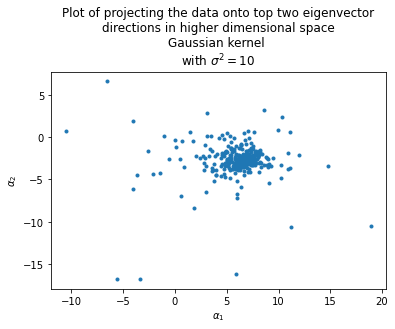

In [355]:
#plotting the higher dimesional data into 2 principal components (lower subspace)

final_plot=np.zeros((300,2))
for i in range(0,300):
    final_plot[i]=np.matmul(A.T,kernel[:,i])
#final_plot.shape
plt.plot(final_plot[:,0],final_plot[:,1],'.')
#plt.xlim([0,10])
#plt.ylim([-6,2])
plt.title("Plot of projecting the data onto top two eigenvector\ndirections in higher dimensional space\nGaussian kernel \nwith $\sigma^2=10$")
plt.xlabel(r"$\alpha_1$")
plt.ylabel(r"$\alpha_2$")
plt.show()

In [ ]:
"""
Note: to change kernel edit the KPCA algorithm.
"""